# Среднее значение по факторам иммунизации

In [3]:
import sys
# Добавим папку проекта в список системных директорий, чтобы Python видел путь к папке utils
sys.path.append('..')

In [4]:
import pandas as pd

from utils.constants import (
    F, 
)
from utils.graphics import (
    display_corellation_by_target,
)
from utils.display_content import (
    dislay_some_fields_description,
)
from utils.prepare_data import (
    move_column_to_end_table,
)

from warnings import simplefilter
simplefilter('ignore')

In [5]:
# Загрузим таблицу
data = pd.read_csv('../data/cumulative_life_expectancy_prepared.csv')

data.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,AdultMortality,Homicides,MaternalMortality,AdultNcdMortality,AdultNcdMortality117,...,BmiTeenagerOverweight2,Sanitation,DrinkingWater,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,GdpPerCapita,Population,Schooling,LifeExpectancy
0,AFR,Africa,AGO,Angola,2000,34.56,0.01331,0.859921,30.5,0.028126,...,0.99,27.56,41.14,2.74,1.11,7.66,563.733796,16194869.0,5.027188,49.37
1,AFR,Africa,AGO,Angola,2001,33.86,0.01310,0.799641,29.7,0.027503,...,1.07,28.99,42.25,5.97,2.05,13.35,533.586202,16747208.0,5.092250,50.06
2,AFR,Africa,AGO,Angola,2002,32.51,0.01288,0.758272,29.4,0.027049,...,1.14,30.42,43.38,4.19,1.31,11.54,882.147847,17327699.0,5.157312,51.06
3,AFR,Africa,AGO,Angola,2003,32.16,0.01265,0.676496,29.3,0.026962,...,1.22,31.86,44.36,4.26,1.47,14.55,992.698979,17943712.0,5.222375,51.74
4,AFR,Africa,AGO,Angola,2004,32.24,0.01229,0.594192,29.0,0.026300,...,1.31,33.29,45.35,5.66,1.69,21.36,1266.210864,18600423.0,5.287437,52.36


Возьмем среднее значение по трем факторам иммунизации (от кори, полиомелита и дифтерии).\
И удалим исходные признаки.\
Так как все три фактора имеют сильную корреляцию между собой.

In [6]:
# Факторы иммунизации
immunization_fields = [
    F.PolioImmunization.value,
    F.MeaslesImmunization.value,
    F.DiphtheriaImmunization.value
]

dislay_some_fields_description(
    immunization_fields,
    title='Факторы иммунизации'
)

**Факторы иммунизации:**

- `PolioImmunization` - Охват иммунизацией от полиомиелита (Pol3) среди детей в возрасте 1 года (%)

- `MeaslesImmunization` - Охват первой дозой вакцины, содержащей коревой компонент (MCV1), среди детей в возрасте 1 года (%)

- `DiphtheriaImmunization` - Охват иммунизацией детей в возрасте 1 года дифтерийно-столбнячным анатоксином и коклюшем (АКДС3) (%)

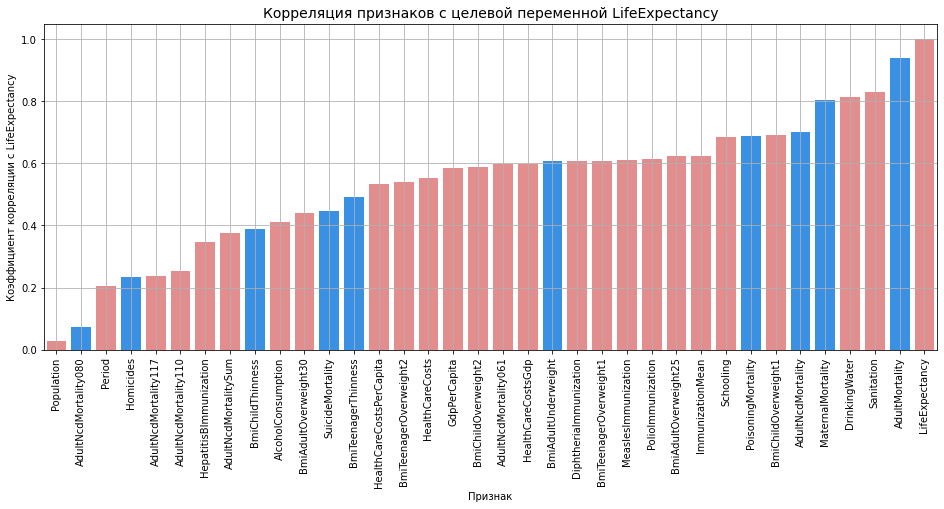

In [7]:
# Возьмем среднее по трем признакам
data[F.ImmunizationMean.value] = \
    data[immunization_fields].mean(axis=1)

# Сравним корреляцию нового и старых признаков с целевым
display_corellation_by_target(data, figsize=(16, 6))

Новый фактор имеет корреляцию с целевым признаком близкую к 0.6. \
И бОльшую, чем изначальные 3 признака.

In [8]:
# Удалим исходные признаки
data.drop(columns=immunization_fields, inplace=True)

# Переставим столбец с таргетом в конец таблицы
data = move_column_to_end_table(data, F.LifeExpectancy.value)

data.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,AdultMortality,Homicides,MaternalMortality,AdultNcdMortality,AdultNcdMortality117,...,Sanitation,DrinkingWater,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,GdpPerCapita,Population,Schooling,ImmunizationMean,LifeExpectancy
0,AFR,Africa,AGO,Angola,2000,34.56,0.01331,0.859921,30.5,0.028126,...,27.56,41.14,2.74,1.11,7.66,563.733796,16194869.0,5.027188,28.000000,49.37
1,AFR,Africa,AGO,Angola,2001,33.86,0.01310,0.799641,29.7,0.027503,...,28.99,42.25,5.97,2.05,13.35,533.586202,16747208.0,5.092250,43.333333,50.06
2,AFR,Africa,AGO,Angola,2002,32.51,0.01288,0.758272,29.4,0.027049,...,30.42,43.38,4.19,1.31,11.54,882.147847,17327699.0,5.157312,42.666667,51.06
3,AFR,Africa,AGO,Angola,2003,32.16,0.01265,0.676496,29.3,0.026962,...,31.86,44.36,4.26,1.47,14.55,992.698979,17943712.0,5.222375,37.000000,51.74
4,AFR,Africa,AGO,Angola,2004,32.24,0.01229,0.594192,29.0,0.026300,...,33.29,45.35,5.66,1.69,21.36,1266.210864,18600423.0,5.287437,36.000000,52.36


In [9]:
# Сохраним полученную таблицу
data.to_csv('../data/cumulative_life_expectancy_prepared.csv', index=False)